In [ ]:
text = '평생 살 것처럼 꿈을 꾸어라. 그리고 내일 죽을 것처럼 오늘을 살아라'

tokens = [x for x in text.split(' ')]
print(tokens,'\n')
unique = set(tokens)
unique = list(unique)
print(unique,'\n')
token2idx = {}
for i in range(len(unique)):
  token2idx[unique[i]] = i
print(token2idx)

['평생', '살', '것처럼', '꿈을', '꾸어라.', '그리고', '내일', '죽을', '것처럼', '오늘을', '살아라'] 

['평생', '꾸어라.', '오늘을', '살아라', '그리고', '꿈을', '살', '것처럼', '내일', '죽을'] 

{'평생': 0, '꾸어라.': 1, '오늘을': 2, '살아라': 3, '그리고': 4, '꿈을': 5, '살': 6, '것처럼': 7, '내일': 8, '죽을': 9}


[과제] 상기 작업을 keras를 이용하여 수행하세요

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=10)

tokenizer.fit_on_texts(text)

word_index = tokenizer.word_index

print(word_index)

{'을': 1, '살': 2, '것': 3, '처': 4, '럼': 5, '라': 6, '평': 7, '생': 8, '꿈': 9, '꾸': 10, '어': 11, '그': 12, '리': 13, '고': 14, '내': 15, '일': 16, '죽': 17, '오': 18, '늘': 19, '아': 20}


imdb 데이터 셋을 가져와서 다음 사항을 기준으로 감정분석을 수행하세요.

num_words = 1000, max_len=100

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding

num_words = 1000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
for i in range(10):
  if y_train[i] == 0:
    label = '부정'
  else:
    label = '긍정'
  print(f'{x_train[i]}\n{label}')

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
긍정
[1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 715, 8, 118, 2, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 2, 2

In [ ]:
# pad_sequence() : 데이터의 maxlen보다 길면 데이터를 자름
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_len = 100

pad_x_train = pad_sequences(x_train, maxlen=max_len, padding= 'pre') # 앞에서부터 패딩을 채움
pad_x_test = pad_sequences(x_test, maxlen=max_len)

In [ ]:
model = Sequential()
model.add(Embedding(input_dim = num_words, output_dim = 32, input_length=max_len))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           32000     
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 1)                 3201      
                                                                 
Total params: 35,201
Trainable params: 35,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(pad_x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 3s 3ms/step - loss: 0.5629 - accuracy: 0.7138 - val_loss: 0.4162 - val_accuracy: 0.8062
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3741 - accuracy: 0.8345 - val_loss: 0.3826 - val_accuracy: 0.8248
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3382 - accuracy: 0.8543 - val_loss: 0.3817 - val_accuracy: 0.8244
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3118 - accuracy: 0.8679 - val_loss: 0.3881 - val_accuracy: 0.8250
Epoch 5/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2814 - accuracy: 0.8858 - val_loss: 0.3933 - val_accuracy: 0.8242
Epoch 6/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2492 - accuracy: 0.9032 - val_loss: 0.4069 - val_accuracy: 0.8190
Epoch 7/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2152 - accuracy: 0.9219 - val_loss: 0.4168 - val_accuracy: 0.8154
Epoch 

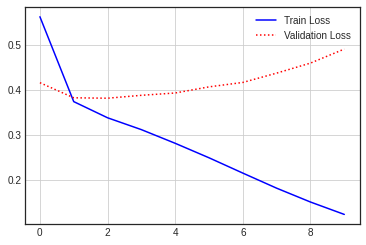

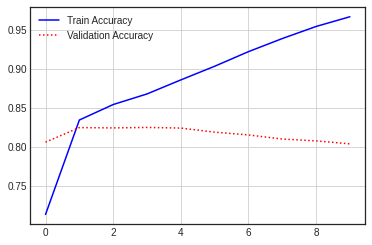

In [ ]:
# 시각화
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

hist_dict = history.history

plt.plot(hist_dict['loss'], 'b-', label='Train Loss')
plt.plot(hist_dict['val_loss'], 'r:', label='Validation Loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(hist_dict['accuracy'], 'b-', label='Train Accuracy')
plt.plot(hist_dict['val_accuracy'], 'r:', label='Validation Accuracy')
plt.legend()
plt.grid()

[과제] imdb 데이터셋을 가져와서 다음 사항을 기준으로 감정분석을 수행하세요.
- num_words = 2000, max_len = 400

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding

num_words = 2000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
# pad_sequence() : 데이터의 maxlen보다 길면 데이터를 자름
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_len = 400

pad_x_train = pad_sequences(x_train, maxlen=max_len, padding= 'pre') # 앞에서부터 패딩을 채움
pad_x_test = pad_sequences(x_test, maxlen=max_len)

In [ ]:
model = Sequential()
model.add(Embedding(input_dim = num_words, output_dim = 32, input_length=max_len))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 400, 32)           64000     
                                                                 
 flatten (Flatten)           (None, 12800)             0         
                                                                 
 dense (Dense)               (None, 1)                 12801     
                                                                 
Total params: 76,801
Trainable params: 76,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(pad_x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 5s 4ms/step - loss: 0.4925 - accuracy: 0.7578 - val_loss: 0.3329 - val_accuracy: 0.8602
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2789 - accuracy: 0.8844 - val_loss: 0.3028 - val_accuracy: 0.8718
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2278 - accuracy: 0.9089 - val_loss: 0.3033 - val_accuracy: 0.8788
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 0.1863 - accuracy: 0.9304 - val_loss: 0.3378 - val_accuracy: 0.8676
Epoch 5/10
625/625 [==============================] - 2s 3ms/step - loss: 0.1468 - accuracy: 0.9492 - val_loss: 0.3296 - val_accuracy: 0.8758
Epoch 6/10
625/625 [==============================] - 2s 3ms/step - loss: 0.1097 - accuracy: 0.9668 - val_loss: 0.3732 - val_accuracy: 0.8616
Epoch 7/10
625/625 [==============================] - 2s 3ms/step - loss: 0.0798 - accuracy: 0.9776 - val_loss: 0.3846 - val_accuracy: 0.8636
Epoch 

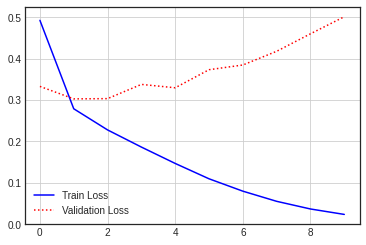

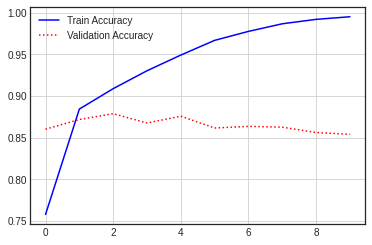

In [ ]:
# 시각화
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

hist_dict = history.history

plt.plot(hist_dict['loss'], 'b-', label='Train Loss')
plt.plot(hist_dict['val_loss'], 'r:', label='Validation Loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(hist_dict['accuracy'], 'b-', label='Train Accuracy')
plt.plot(hist_dict['val_accuracy'], 'r:', label='Validation Accuracy')
plt.legend()
plt.grid()